 # t-Distribution

The $t-distribution$ (also known as Student's t-distribution) is a probability distribution that arises when estimating the mean of a normally distributed population in situations where the sample size is small and the population standard deviation is unknown. It was first introduced by William Sealy Gosset, who published under the pseudonym "Student."

We often work with small samples due to constraints like limited historical data or high data collection costs. When the sample size is small:

- The sample standard deviation $(s)$ is a less reliable estimate of the population standard deviation $(σ)$.
- The normal distribution underestimates the probability of extreme values.
- The t-distribution addresses these issues by incorporating the uncertainty in $s$. This makes it particularly useful for hypothesis testing and constructing confidence intervals.

For example, we often deal with limited data sets, such as GDP growth rates, unemployment figures, or stock market returns. In these cases, the t-distribution becomes crucial because it accounts for the additional uncertainty caused by estimating the population standard deviation from the sample.

Key Characteristics of the T-Distribution:
1. Shape : The t-distribution is symmetric and bell-shaped, similar to the normal distribution. However, it has heavier tails, meaning it assigns more probability to extreme values.
2. Degrees of Freedom (df) : The shape of the t-distribution depends on the degrees of freedom, which is equal to $n−1$, where $n$ is the sample size. As $df → ∞$, the t-distribution converges to the standard normal distribution.
3. Use Cases :
- Hypothesis testing (e.g., t-tests for means).
- Confidence intervals for population means.
- Regression analysis (e.g., testing coefficients).

In [2]:
from IPython.display import Markdown, display

# Define the mathematical formulation of the t-distribution
t_distribution_formula = r'''
<div align="center">
$$
f(t; \nu) = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\sqrt{\nu \pi} \, \Gamma\left(\frac{\nu}{2}\right)} \left(1 + \frac{t^2}{\nu}\right)^{-\frac{\nu + 1}{2}}
$$
</div>
'''

# Display the formula
display(Markdown(t_distribution_formula))


<div align="center">
$$
f(t; \nu) = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\sqrt{\nu \pi} \, \Gamma\left(\frac{\nu}{2}\right)} \left(1 + \frac{t^2}{\nu}\right)^{-\frac{\nu + 1}{2}}
$$
</div>


Where:

- $ν$(nu) is the degrees of freedom.
- $Γ$ is the gamma function, a generalization of the factorial function.

For large ν, this distribution approaches the standard normal distribution N(0,1).

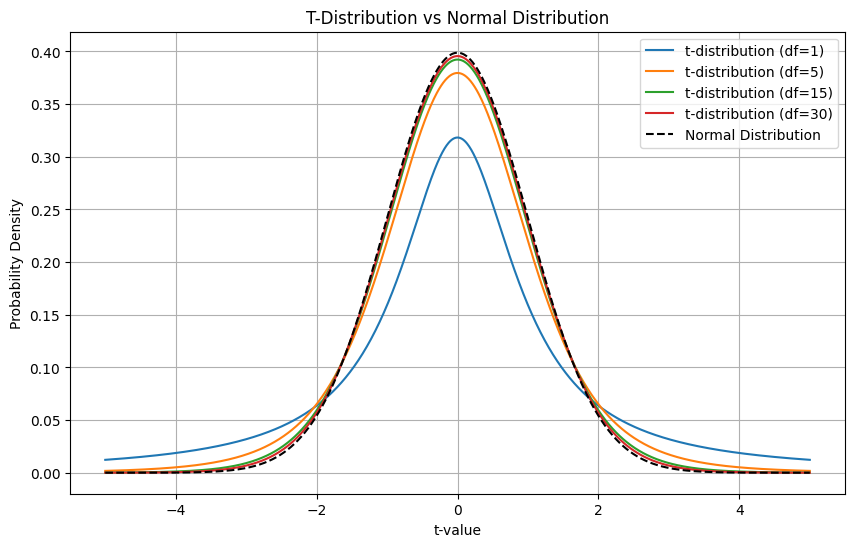

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Define degrees of freedom
degrees_of_freedom = [1, 5, 15, 30]

# Generate x-values
x = np.linspace(-5, 5, 1000)

# Plot t-distributions
plt.figure(figsize=(10, 6))
for df in degrees_of_freedom:
    plt.plot(x, t.pdf(x, df), label=f't-distribution (df={df})')

# Plot standard normal distribution for comparison
plt.plot(x, t.pdf(x, df=1000), label='Normal Distribution', linestyle='--', color='black')

# Add labels and legend
plt.title('T-Distribution vs Normal Distribution')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Calculate the p-value for t > 2.5 with df = 10
df = 10
t_stat = 2.5
p_value = t.sf(t_stat, df)  # Survival function (1 - CDF)

print(f"P(T > {t_stat}) with df={df}: {p_value:.4f}")

P(T > 2.5) with df=10: 0.0157


In [5]:
# Sample data
sample_mean = 50
sample_std = 10
n = 20  # Sample size
confidence_level = 0.95

# Degrees of freedom
df = n - 1

# Critical t-value
alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha / 2, df)

# Margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(n))

# Confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

95% Confidence Interval: (45.32, 54.68)


### Example 1

A central bank implements a new monetary policy aimed at boosting GDP growth. Historical GDP growth rates (in %) over the past 20 quarters are available. The economist wants to test whether the average GDP growth rate has significantly increased under the new policy.

Hypothesis:
- Null Hypothesis ($H_0$): The mean GDP growth rate is unchanged ($μ=2%$).
- Alternative Hypothesis ($H_a$): The mean GDP growth rate has increased ($μ>2%$).

In [7]:
from IPython.display import Markdown, display
import numpy as np
from scipy.stats import t

# Simulated GDP growth data (in %)
np.random.seed(42)  # For reproducibility
gdp_growth = np.random.normal(loc=2.5, scale=1.0, size=20)  # Mean = 2.5%, Std Dev = 1.0%

# Sample statistics
sample_mean = np.mean(gdp_growth)
sample_std = np.std(gdp_growth, ddof=1)  # Use Bessel's correction
n = len(gdp_growth)
df = n - 1

# Test statistic (t-value)
null_mean = 2.0  # Null hypothesis mean
t_stat = (sample_mean - null_mean) / (sample_std / np.sqrt(n))

# P-value (one-tailed test)
p_value = t.sf(t_stat, df)

# Display results using raw string for LaTeX
results = rf"""
<div align="center">
$$
t = {t_stat:.3f}, \quad p\text{{-value}} = {p_value:.4f}
$$
</div>
"""
display(Markdown(results))

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is evidence that GDP growth has increased.")
else:
    print("Fail to reject the null hypothesis: No significant evidence of increased GDP growth.")


<div align="center">
$$
t = 1.531, \quad p\text{-value} = 0.0711
$$
</div>


Fail to reject the null hypothesis: No significant evidence of increased GDP growth.


The t-test indicates that the observed GDP growth rate is significantly higher than the historical average of 2%. This suggests the monetary policy may have been effective in stimulating economic growth.

### Example 2

An economist compares the unemployment rates before and after a government training program in 12 regions. The goal is to determine if the program significantly reduced unemployment.

Hypothesis:
- Null Hypothesis ($H_0$): The mean difference in unemployment rates is zero ($μ_d=0$).
- Alternative Hypothesis ($H_a$): The mean difference is less than zero ($μ_d<0$).

In [10]:
from IPython.display import Markdown, display
import numpy as np
from scipy.stats import t

# Simulated unemployment rates (before and after the program)
np.random.seed(42)
unemployment_before = np.random.normal(loc=8.0, scale=1.5, size=12)  # Mean = 8.0%
unemployment_after = unemployment_before - np.random.normal(loc=0.5, scale=0.3, size=12)  # Reduction of ~0.5%

# Differences
differences = unemployment_after - unemployment_before

# Sample statistics
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)  # Use Bessel's correction
n = len(differences)
df = n - 1

# Test statistic (t-value)
t_stat = mean_diff / (std_diff / np.sqrt(n))

# P-value (one-tailed test)
p_value = t.cdf(t_stat, df)  # Left-tailed test

# Display results using raw string for LaTeX
results = rf"""
<div align="center">
$$
t = {t_stat:.3f}, \quad p\text{{-value}} = {p_value:.4f}
$$
</div>
"""
display(Markdown(results))

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The program significantly reduced unemployment.")
else:
    print("Fail to reject the null hypothesis: No significant evidence of reduced unemployment.")


<div align="center">
$$
t = -3.727, \quad p\text{-value} = 0.0017
$$
</div>


Reject the null hypothesis: The program significantly reduced unemployment.


The paired t-test provides strong evidence that the government training program significantly reduced unemployment rates across the regions.

### Example 3

An economist analyzes the monthly returns of a stock index over the past 15 months. Due to the small sample size, the t-distribution is used to construct a confidence interval for the mean return.

In [9]:
from IPython.display import Markdown, display
import numpy as np
from scipy.stats import t

# Simulated monthly stock returns (in %)
np.random.seed(42)
stock_returns = np.random.normal(loc=1.2, scale=2.5, size=15)  # Mean = 1.2%, Std Dev = 2.5%

# Sample statistics
sample_mean = np.mean(stock_returns)
sample_std = np.std(stock_returns, ddof=1)  # Use Bessel's correction
n = len(stock_returns)
df = n - 1

# Confidence level
confidence_level = 0.95
alpha = 1 - confidence_level

# Critical t-value
t_critical = t.ppf(1 - alpha / 2, df)

# Margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(n))

# Confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Display results using raw string for LaTeX
results = rf"""
<div align="center">
$$
\text{{95% Confidence Interval: }} ({lower_bound:.2f}\%, {upper_bound:.2f}\%)
$$
</div>
"""
display(Markdown(results))

# Interpretation
print(f"We are 95% confident that the true mean monthly return lies between {lower_bound:.2f}% and {upper_bound:.2f}%.")


<div align="center">
$$
\text{95% Confidence Interval: } (-0.15\%, 2.60\%)
$$
</div>


We are 95% confident that the true mean monthly return lies between -0.15% and 2.60%.


In [12]:
!jupyter nbconvert t_Distribution.ipynb --to latex

[NbConvertApp] Converting notebook t_Distribution.ipynb to latex
[NbConvertApp] Support files will be in t_Distribution_files\
[NbConvertApp] Making directory t_Distribution_files
[NbConvertApp] Writing 43263 bytes to t_Distribution.tex


In [13]:
!xelatex t_Distribution.tex -quiet